In [6]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [12]:
# aapl = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
AAPL = wb.DataReader('AAPL', data_source = 'yahoo', start='2015-1-1')
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change(1)
AAPL = AAPL.dropna()


In [26]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949759,-0.028172
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952017,0.000094
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287874,0.014022
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221067,0.038422
2015-01-09,28.312500,27.552500,28.167500,28.002501,214798000.0,25.248119,0.001073
...,...,...,...,...,...,...,...
2022-10-25,152.490005,149.360001,150.089996,152.339996,74732300.0,152.339996,0.019338
2022-10-26,151.990005,148.039993,150.960007,149.350006,88194300.0,149.350006,-0.019627
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.800003,-0.030465


In [27]:
AAPL['Daily Return'].std()

0.018718637411739937

In [28]:
# Two key parts of evaluating performance : 
# Measuring Return and Risk.
# The sharpe ratio aims to combine these measurements in order to faily compare one investment against another.

# How do we convert the daily sharpe ratio to a yearlyu sharpe Ratio???? 
# - There are 252 trading days in a year.
# - Standard deviation is the square root of variance, meaning to be consistent with our units,
# we want to multiply a daily sharpe ratio by sqrt (252) to convert it to a yearly sharpe Ratio.
def compute_sharpe_ratio(df, risk_free_rate = 0):
    mean_return = df['Daily Return'].mean()
    std = df['Daily Return'].std()
    sharpe_ratio = (mean_return - risk_free_rate) / std
    ## getting annual sharpe ratio    
    return sharpe_ratio * (252**0.5) # np.sqrt(252)

In [29]:
sr_apple = compute_sharpe_ratio(AAPL)
sr_apple

0.936699824748538

<AxesSubplot: xlabel='Date'>

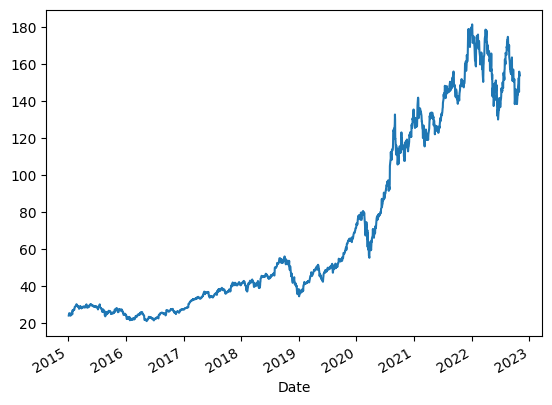

In [30]:
AAPL['Adj Close'].plot()

In [31]:
# siply only take into account the volatility(std. dev.) for returns below a threshold (typically set to zero).
# This means we only take into account downside volatility.

# Sortino Ratio = (Mean Asset Return - Risk Free Return) / Std. Dev. of Downside Returns.


def compute_sortino_ratio(df, threshold=0, risk_free_rate = 0): 
    mean_return = df['Daily Return'].mean()
    #Volatility (Threshold)
    # if T= 0 -> Negative Daily Returns
    downside = df[df['Daily Return'] < threshold]['Daily Return']
    std = downside.std()
    sortino_ratio = (mean_return - risk_free_rate) / std
    return sortino_ratio * (252** 0.5)



In [33]:
sortino_apple = compute_sortino_ratio(AAPL)
sortino_apple

1.277689139429336